# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [7]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
# 設定 data_path
dir_data = '/Users/shihhaohuang/Desktop/data/Part01'

In [10]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: /Users/shihhaohuang/Desktop/data/Part01/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [15]:
#1
"""
Your code here
"""
#cut_rule = 
cut_rule = [-1,0,2,5,19]
#print(pd.cut(app_train['CNT_CHILDREN'],bins))
app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule,labels=['0kid','1~2kid','3~5kids','more than 5 kids'], include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

0kid                215371
1~2kid               87868
3~5kids               4230
more than 5 kids        42
Name: CNT_CHILDREN_GROUP, dtype: int64

Try and error
===

==================================

In [18]:
app_train['CNT_CHILDREN_GROUP']

0            0kid
1            0kid
2            0kid
3            0kid
4            0kid
5            0kid
6          1~2kid
7            0kid
8            0kid
9            0kid
10         1~2kid
11           0kid
12           0kid
13         1~2kid
14           0kid
15           0kid
16           0kid
17         1~2kid
18           0kid
19         1~2kid
20           0kid
21         1~2kid
22         1~2kid
23           0kid
24         1~2kid
25           0kid
26           0kid
27         1~2kid
28           0kid
29           0kid
           ...   
307481       0kid
307482       0kid
307483       0kid
307484       0kid
307485     1~2kid
307486     1~2kid
307487       0kid
307488       0kid
307489       0kid
307490       0kid
307491     1~2kid
307492       0kid
307493       0kid
307494     1~2kid
307495       0kid
307496       0kid
307497       0kid
307498       0kid
307499       0kid
307500       0kid
307501    3~5kids
307502     1~2kid
307503       0kid
307504       0kid
307505    

In [20]:
sub_df =  app_train[app_train['TARGET'] == 1]
sub_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0kid
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0,0kid
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0,0kid
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0kid
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0kid


In [23]:
child0 = app_train[app_train['CNT_CHILDREN_GROUP'] == '0kid']
child1  = app_train[app_train['CNT_CHILDREN_GROUP'] == '1~2kid']
child2 = app_train[app_train['CNT_CHILDREN_GROUP'] == '3~5kids']
child3 = app_train[app_train['CNT_CHILDREN_GROUP'] == 'more than 5 kids']
child3.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN_GROUP
3079,103596,0,Cash loans,M,N,Y,7,85500.0,411813.0,17577.0,...,0,0,0,0.0,0.0,0.0,1.0,1.0,1.0,more than 5 kids
7204,108386,0,Cash loans,M,N,N,6,157500.0,566055.0,16551.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0,more than 5 kids
12615,114709,0,Cash loans,M,Y,N,8,112500.0,755190.0,29947.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,more than 5 kids
17516,120426,0,Cash loans,M,Y,Y,6,315000.0,696150.0,29623.5,...,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0,more than 5 kids
23881,127782,1,Cash loans,F,N,N,9,180000.0,640080.0,31131.0,...,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,more than 5 kids


In [41]:
grp = 'CNT_CHILDREN3_GROUP:' + child3['CNT_CHILDREN_GROUP'].astype(str) + ',TARGET:' + child3['TARGET'].astype(str)

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN3_GROUP:more than 5 kids,TARGET:0    139159.090909
CNT_CHILDREN3_GROUP:more than 5 kids,TARGET:1    180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

==============================
Try and error
===

In [42]:
#2-1
"""
Your code here
"""
grp = 'The group: ' + app_train['CNT_CHILDREN_GROUP'].astype(str) + ' TARGET:' +app_train['TARGET'].astype(str)

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

The group: 0kid TARGET:0                166747.010980
The group: 0kid TARGET:1                160804.210548
The group: 1~2kid TARGET:0              174590.584401
The group: 1~2kid TARGET:1              176115.362720
The group: 3~5kids TARGET:0             175053.742913
The group: 3~5kids TARGET:1             160677.385714
The group: more than 5 kids TARGET:0    139159.090909
The group: more than 5 kids TARGET:1    180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

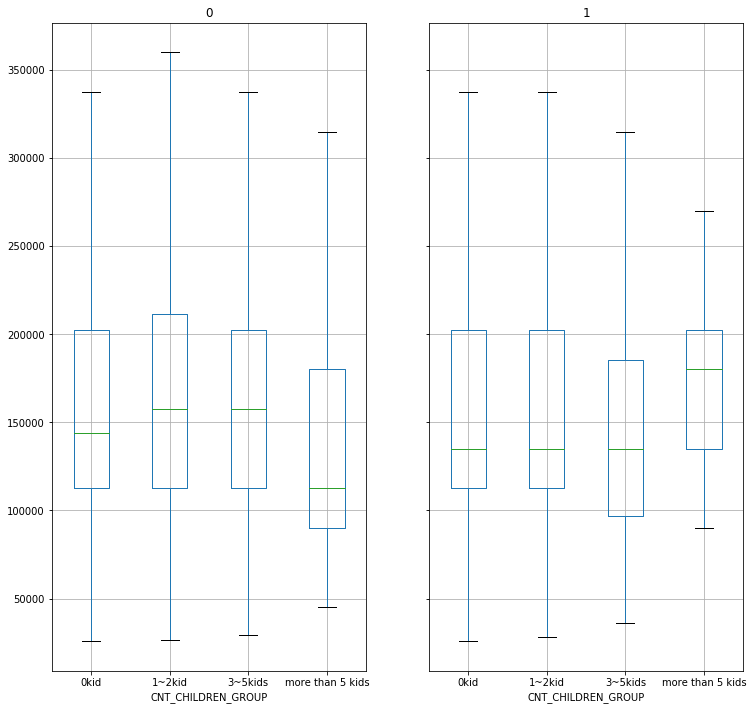

In [45]:
#2-2
"""
Your code here
"""
plt_column = 'AMT_INCOME_TOTAL'
plt_by = 'CNT_CHILDREN_GROUP'

app_train.groupby('TARGET').boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [46]:
#3
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: ((x - np.mean(x))/np.std(x)) )

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.491536
1,270000.0,0.972437
2,67500.0,-0.934708
3,135000.0,-0.298993
4,121500.0,-0.426136
